=== Simulation de la loi de X ===
Paramètre n = 10, nombre de simulations = 100000
Espérance empirique   : 3.6585
Ecart-type empirique : 2.2111
Espérance théorique  : 3.6667
Ecart-type théorique : 2.2111


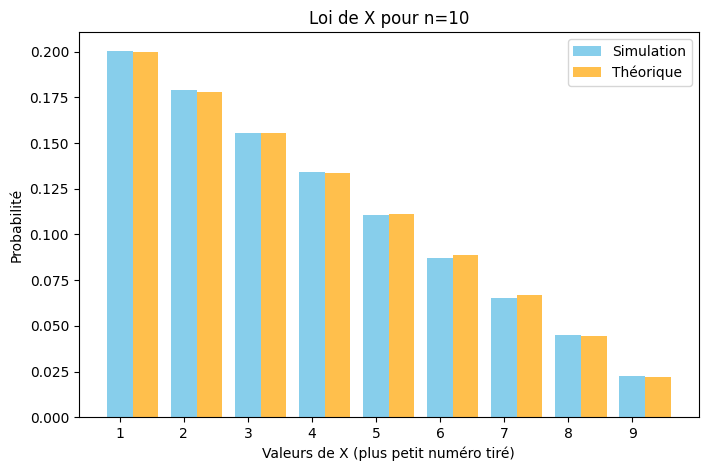

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

def simulation_loi_X(n=10, Nsim=100000):
    if n <= 1:
        raise ValueError("n doit être >= 2")

    # Simuler les tirages : on prend 2 entiers distincts entre 1 et n
    X = []
    for _ in range(Nsim):
        a = random.randint(1, n)
        b = random.randint(1, n)
        while b == a:  # pour assurer sans remise
            b = random.randint(1, n)
        X.append(min(a, b))
    X = np.array(X)

    # Histogramme empirique
    valeurs, counts = np.unique(X, return_counts=True)
    proba_empirique = counts / Nsim

    # Loi théorique
    k_vals = np.arange(1, n)
    proba_theorique = 2*(n - k_vals) / (n*(n-1))

    # Espérance et variance théoriques
    E_theo = (n + 1)/3
    Var_theo = (n**2 - n - 2)/18
    sigma_theo = math.sqrt(Var_theo)

    # Empiriques
    E_emp = np.mean(X)
    sigma_emp = np.std(X)

    # --- Résultats ---
    print("=== Simulation de la loi de X ===")
    print(f"Paramètre n = {n}, nombre de simulations = {Nsim}")
    print(f"Espérance empirique   : {E_emp:.4f}")
    print(f"Ecart-type empirique : {sigma_emp:.4f}")
    print(f"Espérance théorique  : {E_theo:.4f}")
    print(f"Ecart-type théorique : {sigma_theo:.4f}")

    # --- Histogrammes ---
    plt.figure(figsize=(8,5))
    plt.bar(valeurs, proba_empirique, width=0.4, color="skyblue", label="Simulation", align="center")
    plt.bar(k_vals+0.4, proba_theorique, width=0.4, color="orange", alpha=0.7, label="Théorique", align="center")
    plt.xticks(k_vals)
    plt.xlabel("Valeurs de X (plus petit numéro tiré)")
    plt.ylabel("Probabilité")
    plt.title(f"Loi de X pour n={n}")
    plt.legend()
    plt.show()


# -------------------------------
# Exécution
# -------------------------------
simulation_loi_X(n=10, Nsim=100000)
